In [1]:
!pip install spotipy

In [2]:
!pip install wordcloud -q

Autenticação do app ao spotify usando a lib Spotipy

In [3]:
import pandas as pd
import spotipy
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import numpy as np
import seaborn as sns


In [4]:
sp = spotipy.Spotify()

In [5]:
sns.set_style("whitegrid")

Indicando conta e senha para o pareamento.

In [11]:
from spotipy.oauth2 import SpotifyClientCredentials 
 
cid ='3edc975cfb4b4d138d5f7c36fb79e49b' 
secret = '659bcda6b4ee420f8e62017d1975f3ed' 
client_credentials_manager = SpotifyClientCredentials(client_id=cid, 
client_secret=secret) 
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager) 
sp.trace=False 

# Encontrado em https://developer.spotify.com/dashboard/applications/3edc975cfb4b4d138d5f7c36fb79e49b


In [12]:
playlists = sp.user_playlists('leocadio_andre')

Obtendo as músicas de 3 playlists diferentes da minha conta do spotify
Esse endpoint retorna de 100 em 100 registros, por isso usei o atributo offset para obter os resultados paginados

Foi usado o id da playlist para a sua localização.

In [15]:
playlist = sp.user_playlist_tracks('leocadio_andre', '6y2ywpuzRRevRthmikddnH', offset=0) 
songs1 = playlist['items']

playlist = sp.user_playlist_tracks('leocadio_andre', '6y2ywpuzRRevRthmikddnH', offset=100) 
songs2 = playlist['items']

playlist = sp.user_playlist_tracks('leocadio_andre', '6y2ywpuzRRevRthmikddnH', offset=200) 
songs3 = playlist['items']

playlist = sp.user_playlist_tracks('leocadio_andre', '6y2ywpuzRRevRthmikddnH', offset=300) 
songs4 = playlist['items']

playlist = sp.user_playlist_tracks('leocadio_andre', '6y2ywpuzRRevRthmikddnH', offset=400) 
songs5 = playlist['items']

songs = songs1+songs2+songs3+songs4+songs5

In [16]:
playlist = sp.user_playlist_tracks('leocadio_andre', '2nd32QkWwfo9jH0RpanHz2', offset=0) 
songs6 = playlist['items']

playlist = sp.user_playlist_tracks('leocadio_andre', '2nd32QkWwfo9jH0RpanHz2', offset=100) 
songs7 = playlist['items']

songs = songs+songs6+songs7

In [17]:
playlist = sp.user_playlist_tracks('leocadio_andre', '35dLiYrkAem0c8NCF67BX3', offset=0) 
songs8 = playlist['items']

playlist = sp.user_playlist_tracks('leocadio_andre', '35dLiYrkAem0c8NCF67BX3', offset=100) 
songs9 = playlist['items']

songs = songs+songs8+songs9
songs

df = pd.DataFrame(songs)
df

,added_at,added_by,is_local,primary_color,track,video_thumbnail
0,2016-09-23T20:51:52Z,{'external_urls': {'spotify': 'https://open.sp...,False,None,"{'album': {'album_type': 'album', 'artists': [...",{'url': None}
1,2016-09-23T20:52:06Z,{'external_urls': {'spotify': 'https://open.sp...,False,None,"{'album': {'album_type': 'album', 'artists': [...",{'url': None}
2,2016-09-23T20:52:21Z,{'external_urls': {'spotify': 'https://open.sp...,False,None,"{'album': {'album_type': 'album', 'artists': [...",{'url': None}
3,2016-09-23T21:04:35Z,{'external_urls': {'spotify': 'https://open.sp...,False,None,"{'album': {'album_type': 'album', 'artists': [...",{'url': None}
4,2016-09-23T21:10:58Z,{'external_urls': {'spotify': 'https://open.sp...,False,None,"{'album': {'album_type': 'single', 'artists': ...",{'url': None}
5,2016-09-23T21:13:08Z,{'external_urls': {'spotify': 'https://open.sp...,False,None,"{'album': {'album_type': 'album', 'artists': [...",{'url': None}
6,2016-09-23T21:13:40Z,{'external_urls': {'spotify': 'https://open.sp...,False,None,"{'album': {'album_type': 'album', 'artists': [...",{'url': None}
7,2016-09-23T21:18:05Z,{'external_urls': {'spotify': 'https://open.sp...,False,None,"{'album': {'album_type': 'album', 'artists': [...",{'url': None}
8,2016-09-23T21:18:20Z,{'external_urls': {'spotify': 'https://open.sp...,False,None,"{'album': {'album_type': 'album', 'artists': [...",{'url': None}
9,2016-09-23T21:18:58Z,{'external_urls': {'spotify': 'https://open.sp...,False,None,"{'album': {'album_type': 'album', 'artists': [...",{'url': None}


Obtendo dados de artistas, albuns e músicas do spotify

Foi montado 2 Dataframes, o primeiro com infomações sobre a música e seus respectivos artista e álbum.

No segundo com informações específicas do artista, para obter seus gêneros músicais e a popularidade no spotify

In [18]:
musics_info = []
artists = []

for i, item in enumerate(songs):
    track = item['track']
    added_at = item['added_at']
    try:
      artist = sp.artist(track['artists'][0]['id'])
    except AttributeError:
       print('Erro ao obter dados do artista')
    musics_info.append((track['artists'][0]['name'], track['name'], track['album']['name'], added_at, track['id']))
    artists.append((track['artists'][0]['name'], track['artists'][0]['id'], artist['genres'], artist['popularity'] ))

#print(artists)

pd.set_option('display.max_rows', 50)
musics = pd.DataFrame(musics_info, columns=('Artists', 'Name', 'Album', 'Added_At', 'Id'))
musics

,Artists,Name,Album,Added_At,Id
0,Foo Fighters,Walk,Wasting Light,2016-09-23T20:51:52Z,76Je5Wklky23mVoxiRszcN
1,AC/DC,It's a Long Way to the Top (If You Wanna Rock ...,High Voltage,2016-09-23T20:52:06Z,7nemcVsXVFZF01iqpIIo2Y
2,Jimi Hendrix,All Along the Watchtower,Electric Ladyland,2016-09-23T20:52:21Z,2aoo2jlRnM3A0NyLQqMN2f
3,The Mars Volta,Goliath,The Bedlam in Goliath,2016-09-23T21:04:35Z,2OIca10vMnqiJyDELHiPJb
4,The Raconteurs,"Steady, As She Goes (Acoustic)","Steady, As She Goes",2016-09-23T21:10:58Z,73HRSW62DFn6FP0c4UTI86
5,We Hunt Buffalo,21st Century Schizoid Man - Written By King Cr...,We Hunt Buffalo,2016-09-23T21:13:08Z,0KXRsLgp4NTFJ0TDTwHGuW
6,Yes,Leave It,90125 (Deluxe Version),2016-09-23T21:13:40Z,3qSlbAE7VfK1AVyxfoHNJZ
7,Gary Clark Jr.,Numb - Live,Gary Clark Jr. Live,2016-09-23T21:18:05Z,4WsAhe3BwtSUosqyqgbNMq
8,The Stone Roses,Love Spreads,Second Coming,2016-09-23T21:18:20Z,1vW6lAtewJNs7oezT8wDQd
9,Dire Straits,Lady Writer,Communique (Remastered),2016-09-23T21:18:58Z,2CZgzbPQPClQzJNClE3pjb


In [19]:
df_artists = pd.DataFrame(artists, columns=('Name', 'Id', 'Genres', 'Popularity'))
df_artists

,Name,Id,Genres,Popularity
0,Foo Fighters,7jy3rLJdDQY21OgRLCZ9sD,"[alternative metal, alternative rock, modern r...",80
1,AC/DC,711MCceyCBcFnzjGY4Q7Un,"[album rock, australian rock, hard rock, rock]",84
2,Jimi Hendrix,776Uo845nYHJpNaStv1Ds4,"[acid rock, album rock, blues rock, classic ro...",74
3,The Mars Volta,75U40yZLLPglFgXbDVnmVs,"[alternative metal, alternative rock, el paso ...",55
4,The Raconteurs,4wo1267SJuUfHgasdlfNfc,"[alternative rock, garage rock, indie rock, mo...",63
5,We Hunt Buffalo,6Bz2ZeTKI0cyJwt7tBKoUU,"[canadian stoner rock, retro metal]",31
6,Yes,7AC976RDJzL2asmZuz7qil,"[album rock, art rock, classic rock, hard rock...",64
7,Gary Clark Jr.,01aC2ikO4Xgb2LUpf9JfKp,"[blues rock, electric blues, funk, garage rock...",64
8,The Stone Roses,1lYT0A0LV5DUfxr6doRP3d,"[britpop, madchester, modern rock, rock]",65
9,Dire Straits,0WwSkZ7LtFUFjGjMZBMt6T,"[album rock, blues rock, classic rock, mellow ...",77


In [20]:
len(df_artists['Name'].unique().tolist())

473

Montando Dataframe de gêneros musicais dentre as bandas das playlists

In [21]:
genres = []
for index, row in df_artists.iterrows():
    for i, item in enumerate(row['Genres']):
      genres.append(item)

genres_df = pd.DataFrame(genres, columns =['Count'])
genres_df

,Count
0,alternative metal
1,alternative rock
2,modern rock
3,permanent wave
4,post-grunge
5,rock
6,album rock
7,australian rock
8,hard rock
9,rock


In [22]:
genres_df['Count'].value_counts()

rock                        365
classic rock                189
album rock                  171
hard rock                   135
art rock                    133
alternative rock            132
alternative metal           111
blues rock                  108
garage rock                 102
permanent wave               92
modern rock                  87
psychedelic rock             87
post-grunge                  80
stoner rock                  80
progressive rock             77
metal                        77
symphonic rock               71
stoner metal                 68
nu metal                     65
dance rock                   64
space rock                   58
grunge                       48
psychedelic doom             45
new wave                     43
neo-psychedelic              40
                           ... 
alabama indie                 1
german black metal            1
bow pop                       1
progressive sludge            1
eau claire indie              1
rap     

In [26]:
musics['Artists'].value_counts().head(40)


Alice In Chains                     20
Rush                                15
Queens of the Stone Age             15
David Bowie                         14
Pink Floyd                          12
Porcupine Tree                      11
Ramones                              9
The Rolling Stones                   8
Black Sabbath                        8
Charlie Brown Jr.                    7
Oasis                                7
The Cure                             7
King Crimson                         7
Deep Purple                          7
The Smashing Pumpkins                7
Judas Priest                         6
Dire Straits                         6
Hammerhead Blues                     6
Santana                              6
Tame Impala                          6
Led Zeppelin                         6
Opeth                                6
The Police                           6
The Black Keys                       5
Arctic Monkeys                       5
Anathema                 

In [27]:
musics['Album'].value_counts().head(40)

Dirt                                                   6
Argus                                                  5
Anesthetize                                            5
Caravan of Light                                       5
Station To Station (2016 Remastered Version)           4
The Devil Put Dinosaurs Here                           4
Transpiração Continua Prolongada                       4
Depois do Fim                                          4
Songs For The Deaf                                     4
Permanent Waves                                        4
Villains                                               4
Mellon Collie And The Infinite Sadness (Remastered)    4
Sorceress                                              3
Exile On Main Street (2010 Re-Mastered)                3
Brain Drain                                            3
Detourn                                                3
Low                                                    3
The Division Bell              

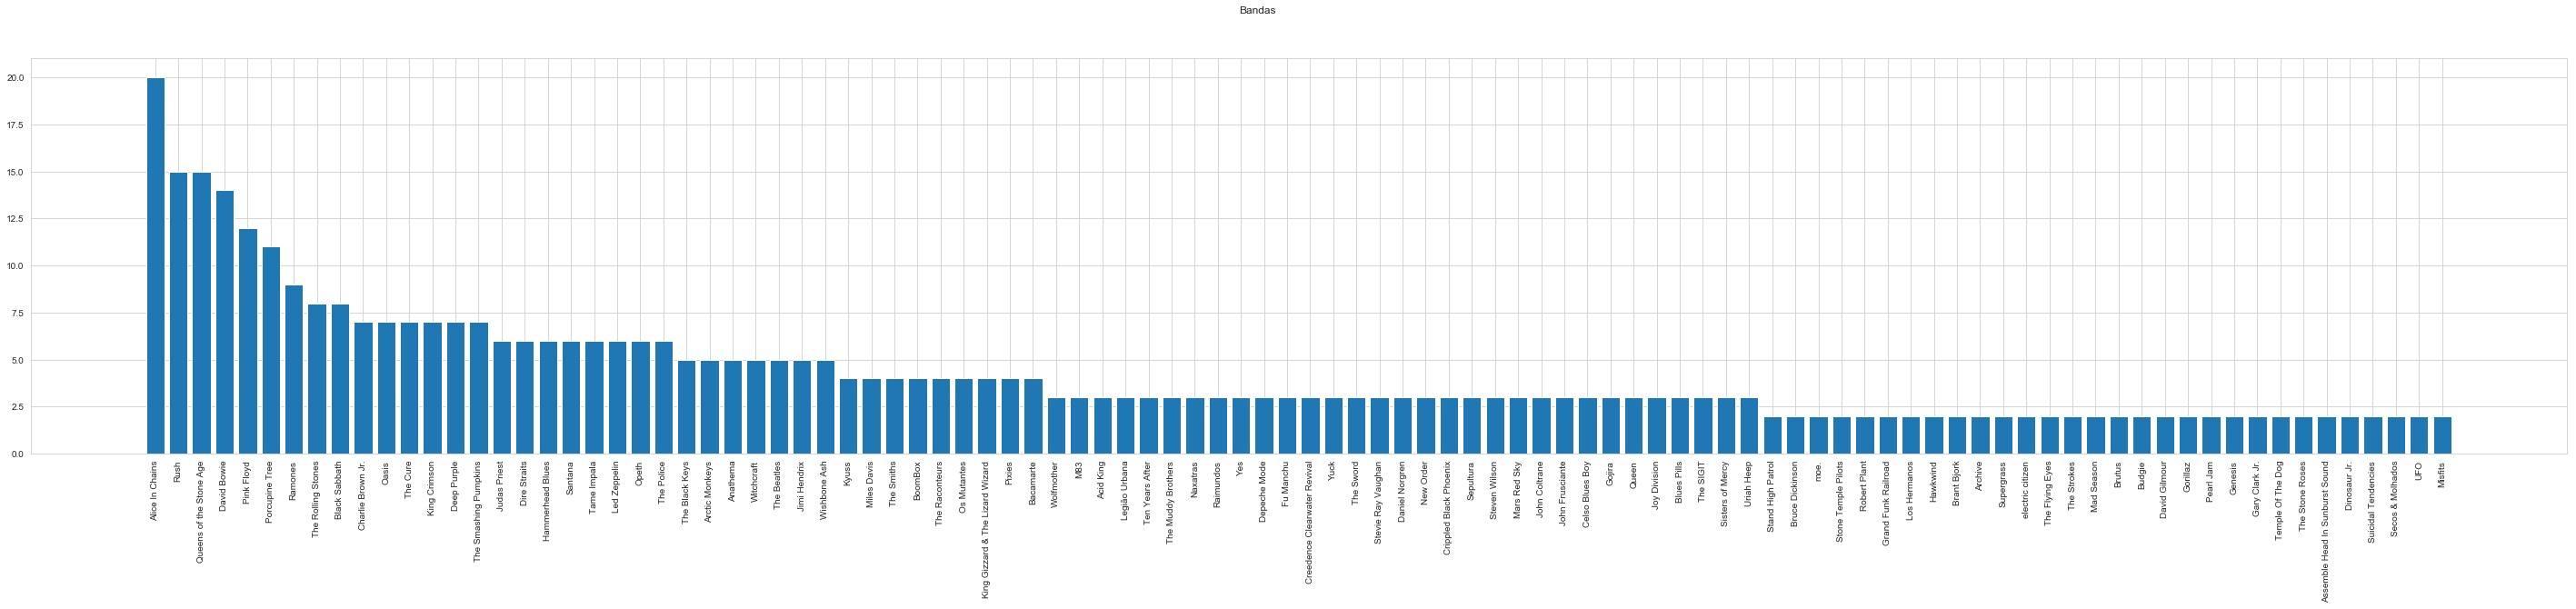

In [33]:
# 100 Bandas mais presentes

names = list(musics['Artists'].value_counts().keys())[:100]
values = list(musics['Artists'].value_counts())[:100]

fig, axs = plt.subplots(figsize=(50,8))
axs.bar(names, values)
plt.xticks(rotation=90);
fig.suptitle('Bandas');

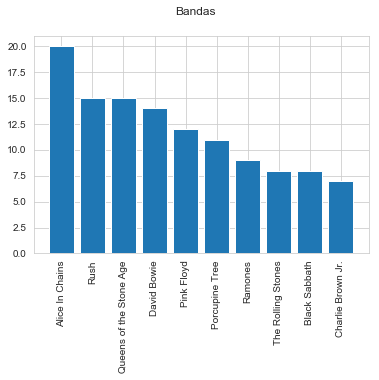

In [34]:
#10 Bandas mais presentes


names = list(musics['Artists'].value_counts().head(10).keys())
values = list(musics['Artists'].value_counts().head(10))

fig, axs = plt.subplots()
axs.bar(names, values)
plt.xticks(rotation=90);
fig.suptitle('Bandas');

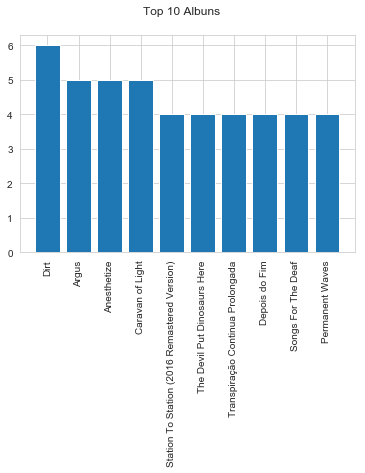

In [35]:
# 10 Albums mais presentes

names = list(musics['Album'].value_counts().head(10).keys())
values = list(musics['Album'].value_counts().head(10))

fig, axs = plt.subplots()
axs.bar(names, values)
plt.xticks(rotation=90);
fig.suptitle('Top 10 Albuns');

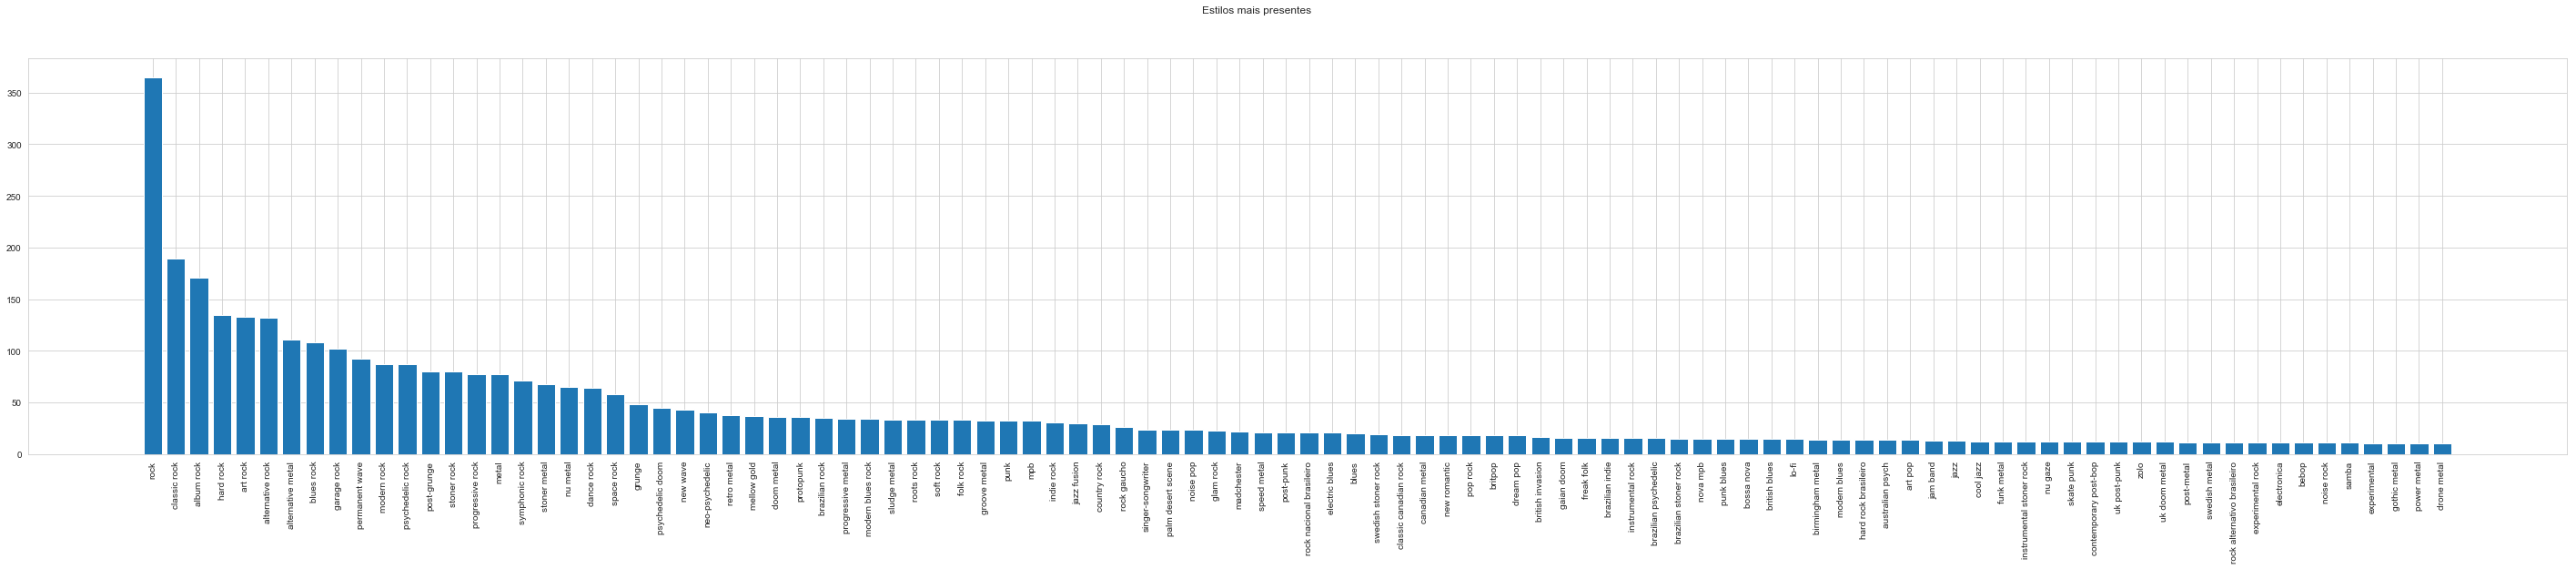

In [37]:
names = list(genres_df['Count'].value_counts().keys())[:100]
values = list(genres_df['Count'].value_counts())[:100]

fig, axs = plt.subplots(figsize=(50,8))
axs.bar(names, values)
plt.xticks(rotation=90);
fig.suptitle('Estilos mais presentes');

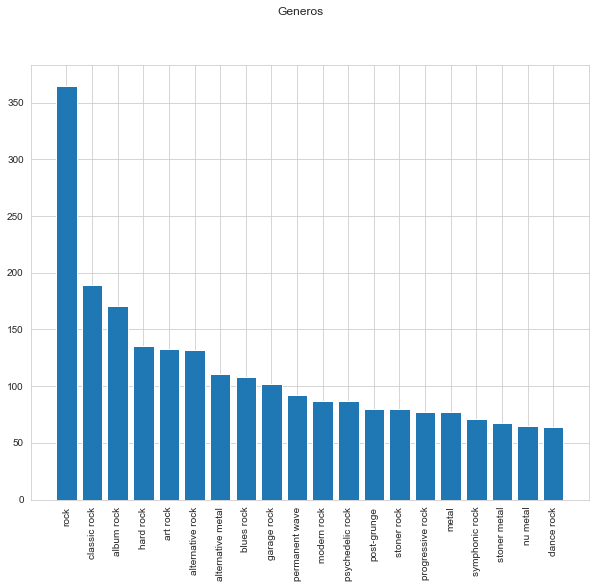

In [38]:
# 20 Estilos mais presentes

names = list(genres_df['Count'].value_counts().head(20).keys())
values = list(genres_df['Count'].value_counts().head(20))

fig, axs = plt.subplots(figsize=(10,8))
axs.bar(names, values)
plt.xticks(rotation=90);
fig.suptitle('Generos');

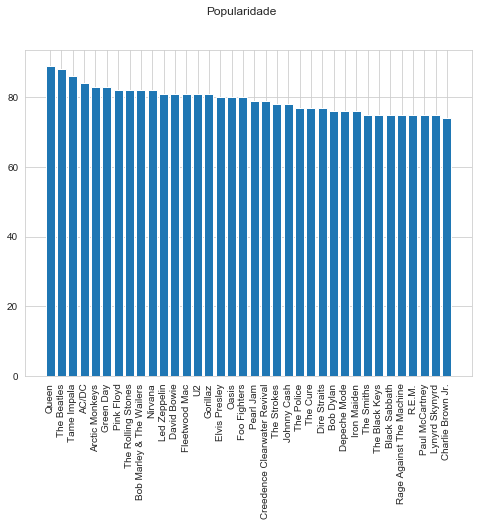

In [39]:
#Bandas mais populares no Spotify

df_artists = df_artists.sort_values(by=['Popularity'], ascending=False)

names = df_artists['Name'].head(132)
values =  df_artists['Popularity'].head(132)

fig, axs = plt.subplots(figsize=(8,6))
axs.bar(names, values)
plt.xticks(rotation=90);
fig.suptitle('Popularidade');

Wordcloud com as bandas mais citadas nas playlists analisadas.

In [41]:
all_summary = " ".join(s for s in musics['Artists'])

print("Quantidade de Palavras: {}".format(len(all_summary)))

Quantidade de Palavras: 10606


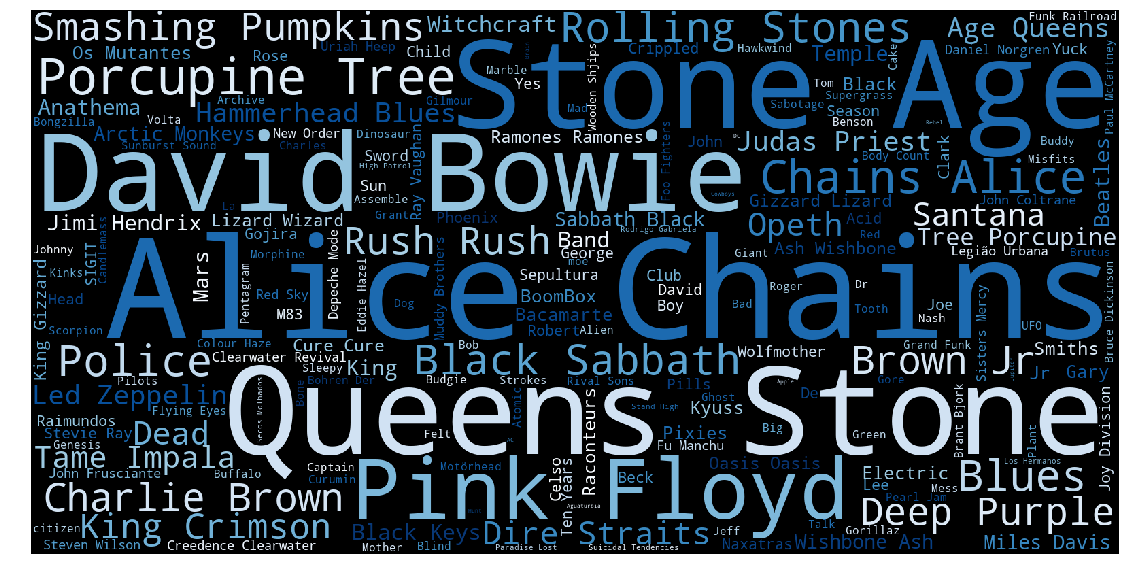

In [42]:
# gerar uma wordcloud
wordcloud = WordCloud(background_color="black",
                      width=1600, height=800, colormap="Blues").generate(all_summary)

# mostrar a imagem final
fig, ax = plt.subplots(figsize=(20,10))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud)
wordcloud.to_file("bandas_spotify_andreleocadio.png");